# Kappa model analysis

## Imports

In [1]:
import sys
import os
import cPickle as pickle
import numpy as np
from matplotlib import pyplot as plt
gleam_root = "/Users/phdenzel/gleam"
sys.path.append(gleam_root)
from gleam.glass_interface import glass_renv
from gleam.utils.lensing import LensModel
from gleam.utils.lensing import kappa_profile, find_einstein_radius, inertia_tensor, qpm_abphi
from gleam.utils.plotting import viewstate_plots, kappa_map_plot, kappa_profiles_plot
import gleam.utils.colors as gclr
glass = glass_renv()

## Read kappa maps

In [2]:
files = !ls models/kappa/*/*.fits
# files = !ls models/kappa/AGNT8/*.fits
# files = !ls models/kappa/FBconst/*.fits
# files

In [3]:
models = LensModel(files)
print(models.__v__)

filename            	lensmodels.fits
filepath            	lensmodels.fits
N                   	1577
pixrad              	80
maprad              	4.0
pixel_size          	0.0496894409938
kappa               	None
minima              	[]
saddle_points       	[]
maxima              	[]


## Rescale maps

In [4]:
target_RE = 1.2667
zl = 0.23
zs = 0.8
newzl = 0.2076
newzs = 0.5241

models.rescale(zl, zs, newzl, newzs)
print(models.__v__)

filename            	lensmodels.fits
filepath            	lensmodels.fits
N                   	1577
pixrad              	80
maprad              	4.0
pixel_size          	0.0496894409938
kappa               	None
minima              	[]
saddle_points       	[]
maxima              	[]


## Visual check

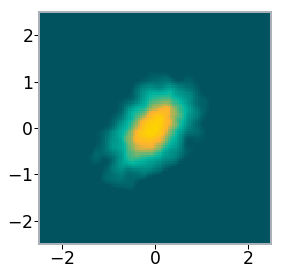

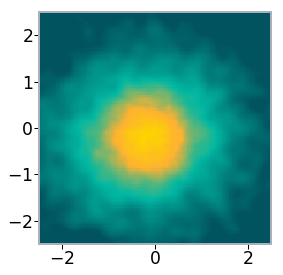

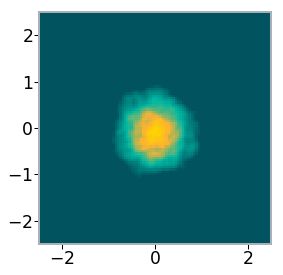

In [5]:
# %matplotlib notebook
for i in range(0, models.N, 32)[:3]:
    # kappa_map_plot(models, mdl_index=i, contours=True, log=True)
    kappa_map_plot(models, mdl_index=i, log=True)
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.show()

## Calculate Einstein radii

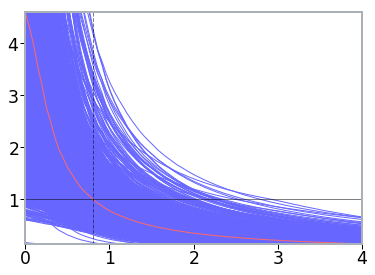

In [6]:
# plt.plot(kappa_profiles[1][0], kappa_profiles[1][1])
kappa_profiles_plot(models, ensemble_average=True)  # , as_range=True, interpolate=400)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(0.1, 4)
# plt.ylim(0.1, 15)
plt.show()

In [7]:
# first re-calculate profiles
kappa_profiles = []
for i in range(0, models.N):
    kp = kappa_profile(models, mdl_index=i)
    kappa_profiles.append(kp)
# kappa_profiles.append(kappa_profile(models, mdl_index=-1))
# get einstein radii from profiles
einstein_radii = []
for i, (r, kp) in enumerate(kappa_profiles):
    r_E = find_einstein_radius(r, kp)
    einstein_radii.append(r_E)
einstein_radii = np.array(einstein_radii)

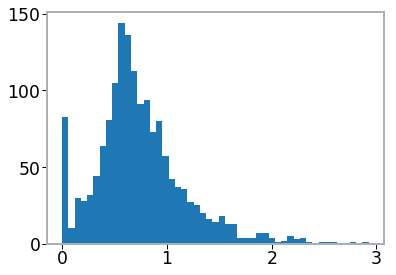

In [8]:
bins = np.linspace(0, einstein_radii.max(), 50)
plt.hist(einstein_radii, bins=bins)
plt.show()

In [9]:
pm = [-0.3, 0.2]
cond = [einstein_radii > (target_RE+pm[0]), einstein_radii < (target_RE+pm[1])]
select = cond[0] * cond[1]
print("Number of selected lenses: {}".format(len(einstein_radii[select])))

Number of selected lenses: 257


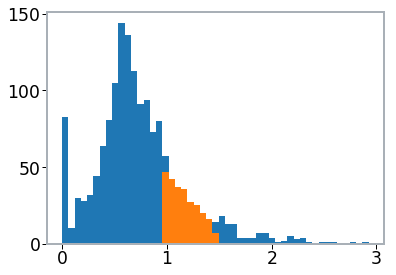

In [10]:
plt.hist(einstein_radii, bins=bins, color='tab:blue')
plt.hist(einstein_radii[select], bins=bins, color='tab:orange')
plt.show()

In [11]:
lm = models.subset(mask=select)
# lm = models
print(lm.__v__)

filename            	lensmodels.fits
filepath            	lensmodels.fits
N                   	257
pixrad              	80
maprad              	4.0
pixel_size          	0.0496894409938
kappa               	None
minima              	[]
saddle_points       	[]
maxima              	[]


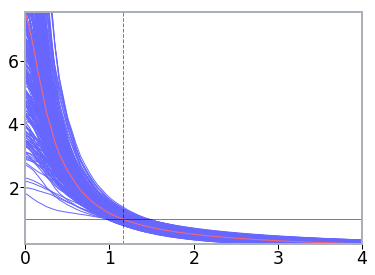

In [12]:
kappa_profiles_plot(lm, ensemble_average=True)
plt.show()

In [13]:
# savename = 'kappa_re{:1.2f}_zl{:1.2f}zs{:1.2f}.pkl'.format(target_RE, newzl, newzs)
# lm.save(savename)